# Data Analysis - Web Scraping Project

NYC Data Science Academy - Bootcamp Winter 2019

Site that was scraped: www.ted.com/talks

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image


In [2]:
dt_frame = pd.read_csv('tedtalks.csv')
dt_frame.describe()

,duration,views,n_lang,n_comments
count,3471.000000,3.471000e+03,3471.000000,3005.000000
mean,737.832901,1.723646e+06,23.646788,171.512146
std,352.669288,2.901919e+06,11.807034,272.120724
min,0.000000,0.000000e+00,0.000000,2.000000
25%,471.500000,6.869205e+05,18.000000,46.000000
50%,749.000000,1.141044e+06,25.000000,100.000000
75%,994.000000,1.747263e+06,31.000000,201.000000
max,3608.000000,5.573491e+07,72.000000,6418.000000


Manipulation of the date and duration of the videos (from seconds to minutes)

In [3]:
dt_frame['year'] = dt_frame['date'].str[-4:]
dt_frame['month'] = dt_frame['date'].apply(lambda x: x[:len(x)-5])
dt_frame = dt_frame.replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],['01','02','03','04','05','06','07','08','09','10','11','12'])
dt_frame['month'] = dt_frame['month']+'/'+dt_frame['year']
dt_frame.columns = dt_frame.columns.str.replace('month','date_new_format')
dt_frame['year'] = dt_frame['year'].apply(lambda x: int(x))
dt_frame['duration_min'] = dt_frame['duration'] / 60
dt_frame.head()

,title,description,keywords,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments,year,date_new_format,duration_min
0,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,"creativity, mind, success, productivity, motiv...",November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.350000
1,The disarming case to act right now on climate,Stockholm native Greta Thunberg first heard ab...,"sustainability, climate change, education",November 2018,0.0,0,8,en | nl | it | sk | fr | de | hr | cs,Greta Thunberg,Greta Thunberg,Greta is a 15-year-old Stockholm native who li...,NaN,2018,11/2018,0.000000
2,"""Autopilote"" / ""Pumper""","Singing in French and English, Mai Lan brings ...","music, live music, performance art, performance",September 2018,548.0,16441,1,en,Mai Lan,Artist,Mai Lan is a French-Vietnamese artist and musi...,NaN,2018,09/2018,9.133333
3,How CRISPR lets you edit DNA,From the smallest single-celled organism to th...,"animation, DNA, TED-Ed, CRISPR, biology, inven...",January 2019,311.0,0,1,en,Andrea M. Henle,Educator,NaN,NaN,2019,01/2019,5.183333
4,"Stunning buildings made from raw, imperfect ma...",What would it take to reimagine the limits of ...,"architecture, creativity, design, technology, ...",November 2018,728.0,51666,1,en,Débora Mesa Molina,Architect,Débora Mesa Molina makes space for experiment...,3.0,2018,11/2018,12.133333


Number of videos per year

Text(0, 0.5, 'Number of videos')

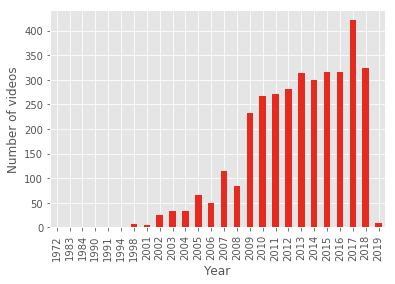

In [4]:
videos_per_year = dt_frame.groupby('year').agg({'title':'count'})
videos_per_year.sort_values(by='year', ascending = True).plot(kind='bar',y='title', color = '#E62B1E', legend=False)
plt.xlabel('Year')
plt.ylabel('Number of videos')

Number of views per year

Text(0, 0.5, 'Average of Views')

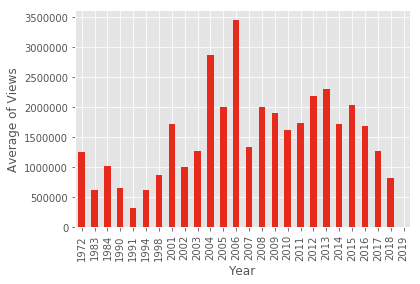

In [5]:
year_views = dt_frame.groupby(['year'])[['views']].mean().reset_index()
year_views.plot(kind='bar',x='year', y='views', color = '#E62B1E', legend=False)
plt.xlabel('Year')
plt.ylabel('Average of Views')

Expand the keywords. Now we are going to have one line for each keywords (multiple lines per video).

In [6]:
dt_frame.keywords = dt_frame.keywords.apply(lambda x: x.split(', '))

index=0
list_ = []
for item in dt_frame.keywords:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
keywords = pd.DataFrame(list_, columns=['index', 'keywords'])

df_keywords = pd.merge(dt_frame.drop('keywords', axis=1), keywords, how='right', left_index=True, right_on='index')
df_keywords.head()

,title,description,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments,year,date_new_format,duration_min,index,keywords
0,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.35,0,creativity
1,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.35,0,mind
2,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.35,0,success
3,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.35,0,productivity
4,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.35,0,motivation


In [7]:
len(keywords.keywords.unique())

448

Wordcloud of the topics

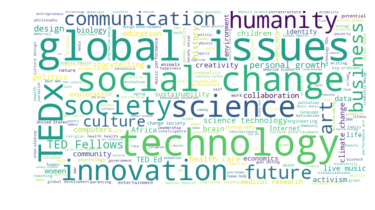

In [8]:
text = ("")
for item in df_keywords['keywords']:
    text = text + "|" + item

 
# Make the figure
wc = WordCloud(background_color="white", width=860, height=450).generate(text)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Relation between mean of views and number of videos per topic

/Users/jamestella/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


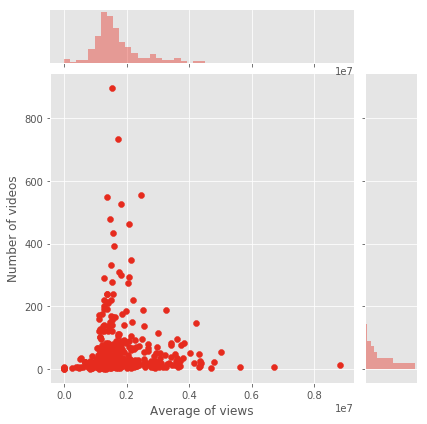

In [9]:
views_title=df_keywords.groupby(['keywords']).agg({'views': 'mean', 'title': 'count'}).sort_values(by = 'views', ascending = False)
vt_graph=sns.jointplot(views_title['views'], views_title['title'], color = '#E62B1E')
vt_graph.set_axis_labels('Average of views', 'Number of videos')

Views > 4,500,000

In [11]:
most_views=views_title[views_title.views > 4500000]
most_views

,views,title
keywords,,
body language,8.827407e+06,12
introvert,6.717924e+06,6
mindfulness,5.632883e+06,5
success,5.021557e+06,53
time,4.792291e+06,21
evil,4.705632e+06,2


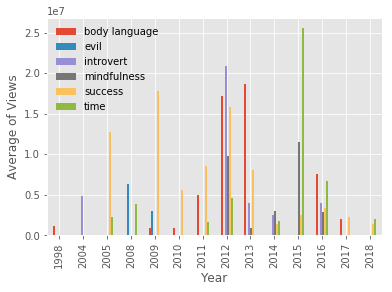

In [12]:
most_view_list=most_views.index
most_views_g=df_keywords[['keywords', 'views', 'year']][df_keywords['keywords'].isin(most_view_list)]
most_views_g=most_views_g.groupby(['year','keywords'])['views'].mean().reset_index()
most_views_g.pivot(index='year', columns='keywords', values='views').plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average of Views')
plt.legend(loc='upper left', frameon=False)

Number of videos > 400

In [13]:
most_title=views_title[views_title.index != 'TEDx']
most_title=most_title[views_title.title > 400].sort_values(by = 'title', ascending = False)
most_title

/Users/jamestella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,views,title
keywords,,
technology,1.530273e+06,897
science,1.729308e+06,735
culture,2.474622e+06,556
global issues,1.383985e+06,548
design,1.456694e+06,480
business,2.064136e+06,463
society,1.580135e+06,435


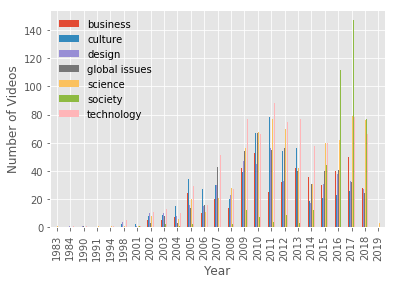

In [14]:
most_title_list=most_title.index
most_title_g=df_keywords[['keywords', 'title', 'year']][df_keywords['keywords'].isin(most_title_list)]
most_title_g=most_title_g.groupby(['year','keywords'])['title'].count().reset_index()
most_title_g.pivot(index='year', columns='keywords', values='title').plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.legend(loc='upper left', frameon=False)

Relation between number of views, number of languages and number of comments

Text(0, 0.5, 'Number of languages')

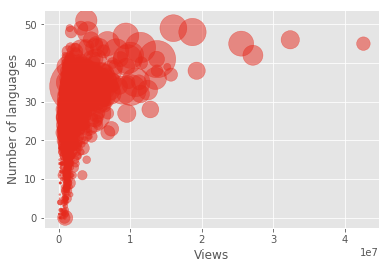

In [101]:
df_filter_year = dt_frame[dt_frame.year > 2012]
plt.scatter(x=df_filter_year['views'], y=df_filter_year['n_lang'], s=df_filter_year['n_comments'], alpha=0.5, color = '#E62B1E')
plt.xlabel('Views')
plt.ylabel('Number of languages')

What kind of professional does talk with more frequency?

In [18]:
df=dt_frame
df.speaker_job = df.speaker_job.apply(lambda x: str(x).lower().split(', '))

index=0
list_ = []
for item in dt_frame.speaker_job:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
speaker_job = pd.DataFrame(list_, columns=['index', 'speaker_job'])

df_speaker_job = pd.merge(dt_frame.drop('speaker_job', axis=1), speaker_job, how='right', left_index=True, right_on='index')
df_speaker_job.head()

,title,description,keywords,date,duration,views,n_lang,lang,speaker,speaker_about,n_comments,year,date_new_format,duration_min,index,speaker_job
0,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,"creativity, mind, success, productivity, motiv...",November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.350000,0,economist
1,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,"creativity, mind, success, productivity, motiv...",November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.350000,0,journalist
2,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,"creativity, mind, success, productivity, motiv...",November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.350000,0,broadcaster
3,The disarming case to act right now on climate,Stockholm native Greta Thunberg first heard ab...,"sustainability, climate change, education",November 2018,0.0,0,8,en | nl | it | sk | fr | de | hr | cs,Greta Thunberg,Greta is a 15-year-old Stockholm native who li...,NaN,2018,11/2018,0.000000,1,greta thunberg
4,"""Autopilote"" / ""Pumper""","Singing in French and English, Mai Lan brings ...","music, live music, performance art, performance",September 2018,548.0,16441,1,en,Mai Lan,Mai Lan is a French-Vietnamese artist and musi...,NaN,2018,09/2018,9.133333,2,artist


In [25]:
len(df_speaker_job.speaker_job.unique())

1828

In [27]:
len(dt_frame.speaker.unique())

2970

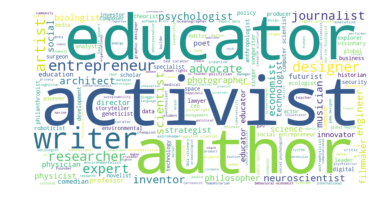

In [21]:
text = ("")
for item in df_speaker_job['speaker_job']:
    text = text + "|" + item

 
# Make the figure
wc = WordCloud(background_color="white", width=860, height=450).generate(text)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [31]:
speaker=dt_frame.groupby(['speaker']).agg({'title': 'count'}).sort_values(by = 'title', ascending = False)
speaker_lis=speaker[speaker.title > 8].index
speaker=dt_frame[dt_frame['speaker'].isin(speaker_lis)]
# speaker.groupby(['speaker','speaker_job','year', 'title', 'keywords'])[['title']].count()
speaker

,title,description,keywords,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments,year,date_new_format,duration_min
423,How octopuses battle each other,"Them's fighting words if you're an octopus, in...","science, marine biology, neuroscience, animals...",June 2018,232.0,387050,2,en | es,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,7.0,2018,06/2018,3.866667
424,The real reason why mosquitoes buzz,What does the love song of a mosquito sound li...,"insects, science, neuroscience, love, animals",June 2018,286.0,302935,2,en | es,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,16.0,2018,06/2018,4.766667
425,This computer is learning to read your mind,Modern technology lets neuroscientists peer in...,"science, brain, neuroscience, electricity",June 2018,351.0,254823,2,en | es,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,12.0,2018,06/2018,5.850000
426,How you can make a fruit fly eat veggies,Can the mind be manipulated to love a food we ...,"science, neuroscience, insects, animals, food",June 2018,269.0,185586,2,en | es,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,NaN,2018,06/2018,4.483333
427,How sound can hack your memory while you sleep,Can you cram for a test while you sleep? Our i...,"science, neuroscience, memory, sleep",June 2018,247.0,509813,2,en | es,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,8.0,2018,06/2018,4.116667
428,How a dragonfly's brain is designed to kill,Dragonflies can catch prey with near perfect a...,"science, animals, insects, neuroscience",June 2018,317.0,963945,2,en | es,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,7.0,2018,06/2018,5.283333
882,Electrical experiments with plants that count ...,Neuroscientist Greg Gage takes sophisticated e...,"communication, biomechanics, electricity, educ...",April 2017,570.0,2053891,23,en | it | sr | ro | fa | tr | hu | ar | fr | p...,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,23.0,2017,04/2017,9.500000
1505,How to control someone else's arm with your brain,Greg Gage is on a mission to make brain scienc...,"TED Fellows, brain, demo, neuroscience, scienc...",March 2015,352.0,6573707,37,en | vi | it | ar | pt-BR | cs | gl | id | es ...,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,188.0,2015,03/2015,5.866667
2232,Religions and babies,Hans Rosling had a question: Do some religions...,"TEDx, data, global issues, population, present...",April 2012,800.0,2463642,39,el | en | vi | it | ar | pt-BR | cs | et | id ...,Hans Rosling,[global health expert; data visionary],"In Hans Rosling’s hands, data sings. Global tr...",498.0,2012,04/2012,13.333333
2300,The cockroach beatbox,"By dissecting a cockroach ... yes, live on sta...","TED Fellows, TED-Ed, brain, life, neuroscience...",November 2011,375.0,778153,21,en | it | ar | pt-BR | az | es | ru | nl | zh-...,Greg Gage,[neuroscientist],TED Fellow Greg Gage helps kids investigate th...,155.0,2011,11/2011,6.250000
